In [3]:
import Tkinter as tk
import tkFileDialog
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from Bakground_Removal import RemoveBackground
%matplotlib inline

In [4]:
tk.Tk().withdraw()
path=tkFileDialog.askdirectory()
print path

/home/edward/project /Image_Data


In [5]:
def load_images(folder):
        image_list=[]
        for filename in os.listdir(folder):
            img=cv2.imread(os.path.join(folder,filename))
            if img is not None:
                image_list.append(img)
        return image_list

In [6]:
images=load_images(path)

In [7]:
images[0].shape 

(768, 1024, 3)

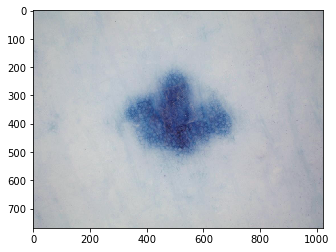

In [8]:
%matplotlib inline
plt.imshow(images[0])

In [9]:
def resize_images(images):
    resize_image=[]
    for image in images:
        imag=cv2.resize(image,(512,512))
        resize_image.append(imag)
    return resize_image

In [16]:
ResizedImages=resize_images(images)

In [38]:
len(A)

100

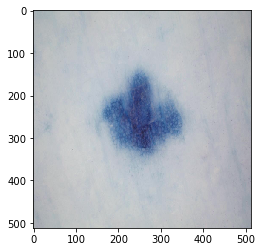

In [12]:
plt.imshow(A[0])

In [13]:
A[0].shape

(512, 512, 3)

In [14]:
"""def save_images():
        tk.Tk().withdraw()
        path=tkFileDialog.askdirectory()
        for i in range(len(A)):
                return cv2.imwrite(os.path.join(path,'imageresized_{}.jpg'.format(i)),A[i])
        """

"def save_images():\n        tk.Tk().withdraw()\n        path=tkFileDialog.askdirectory()\n        for i in range(len(A)):\n                return cv2.imwrite(os.path.join(path,'imageresized_{}.jpg'.format(i)),A[i])\n        "

In [17]:
for i in range(1,len(ResizedImages)+1):
    cv2.imwrite(('imageresized_{}.jpg'.format(i)),ResizedImages[i-1])
    #print 'imageresized_{}.jpg'.format(i)

In [26]:
def BGRemoved_images(images):
    BGRemovedImages=[]
    images=ResizedImages
    for image in images:
        imag=RemoveBackground(image)
        BGRemovedImages.append(imag)
    return BGRemovedImages

In [27]:
BGRemovedImages=BGRemoved_images(ResizedImages)

In [33]:
for i in range(1,len(BGRemovedImages)+1):
    cv2.imwrite(('BGRemovedImages_{}.jpg'.format(i)),BGRemovedImages[i-1])

In [25]:
I=cv2.imread('imageresized_16.jpg')
#cv2.namedWindow("preview")
cv2.imshow("preview", I)
cv2.waitKey()

255

In [ ]:
def mask(mask,RGBImage):
    #R=RGBImage[:,:,2]
    #G=RGBImage[:,:,1]
    #B=RGBImage[:,:,0]
    B,G,R=cv2.split(RGBImage)
    maskRed=np.multiply(R,mask)
    maskGreen=np.multiply(G,mask)
    maskBlue=np.multiply(B,mask)
    maskedImage = cv2.merge([maskRed,maskGreen,maskBlue])
    return maskedImage

In [ ]:
def RemoveBackground(Image):
    IGray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
    ret,BW=cv2.threshold(IGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #ret1,thresh1 = cv2.threshold(th,127,255,cv2.THRESH_BINARY)
    ret2,thresh2 = cv2.threshold(BW,127,255,cv2.THRESH_BINARY_INV)
    maskedImage=mask(thresh2,Image)
    return maskedImage

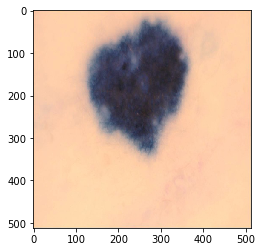

In [4]:

plt.imshow(I)

In [5]:
IGray=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)

In [6]:
IGray.shape

(512, 512)

In [7]:
cv2.imshow("Gray", IGray)
cv2.waitKey(0)

255

In [8]:
ret,BW=cv2.threshold(IGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [9]:
cv2.imshow("BW", BW)
cv2.waitKey(0)

255

In [11]:
#ret1,thresh1 = cv2.threshold(th,127,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(BW,127,255,cv2.THRESH_BINARY_INV)

In [24]:
cv2.imshow("TH1", thresh2)
cv2.waitKey()
cv2.waitKey(0)
#cv2.destroyAllWindows()

255

In [13]:
thresh2.dtype

dtype('uint8')

In [15]:
maskedImage=mask(thresh2,I)

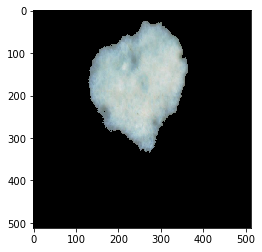

In [16]:
%matplotlib inline
plt.imshow(maskedImage)

In [17]:
thresh2.dtype

dtype('uint8')

In [18]:
cv2.imshow("BGRemovedImage", maskedImage)
cv2.waitKey()

255

In [19]:
cv2.imwrite("BGremovedImage.jpg",maskedImage)

True

In [39]:
ret1,thresh1 = cv2.threshold(IGray,127,255,cv2.THRESH_BINARY)

In [21]:
R=np.multiply(thresh2,I[:,:,2])
G=np.multiply(thresh2,I[:,:,1])
B=np.multiply(thresh2,I[:,:,0])
maskImage = cv2.merge([R,G,B])
cv2.imshow("BGRemovedImage", maskImage)
cv2.waitKey()

255

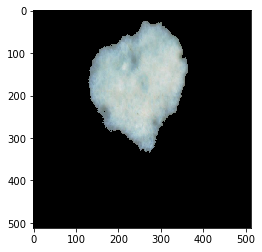

In [26]:
plt.imshow(maskImage)

In [27]:
?cv2.bitwise_and